# k-평균

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/6-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

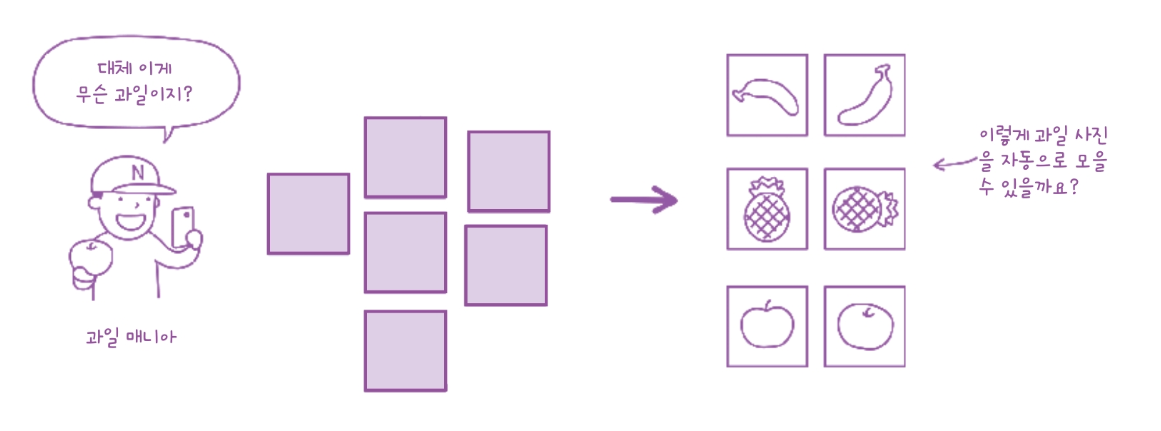

## KMeans 클래스
* 비지도 학습에서는 사진에 어떤 과일이 들어 있는지 알지 못합니다. 
* k-means 군집 알고리즘은 평균값을 자동으로 찾아줍니다. 이 평균값이 클러스터의 중심에 위치하기 때문에 클러스터 중심(cluster center) 또는 센트로이드(centroid)라고 부릅니다. 

In [1]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

## k-평균 알고리즘 작동 방식 소개 
1. 무작위로 k개의 클러스터 중심을 정합니다. 
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정합니다. 
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경합니다. 
4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복합니다. 

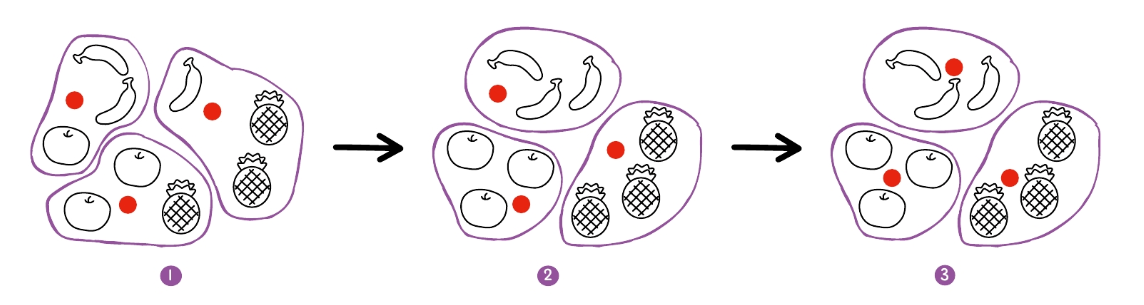

* 먼저 3개의 클러스터 중심(빨간 점)을 랜덤하게 지정 
* 그리고 클러스터 중심에서 가장 가까운 샘플을 하나의 클러스터로 묶음 
* 왼쪽 위부터 시계 방향으로 바나나 2개와 사과 1개 클러스터, 바나나 1개와 파인애플 2개 클러스터, 사과 2개와 파인애플 1개 클러스터가 만들어졌습니다. 
-------
* 클러스터의 중심을 다시 계산하여 이동시킵니다. 
* 맨 아래 클러스터는 사과 쪽으로 중심이 조금 더 이동하고 왼쪽 위의 클러스터는 바나나 쪽으로 중심이 더 이동하는 식입니다. 
-------
* 클러스터 중심을 다시 계산한 다음 가장 가까운 샘플을 다시 클러스터로 묶습니다.(그림2) 
* 이제 3개의 클러스터에는 바나나와 파인애플, 사과가 3개씩 올바르게 묶여 있습니다. 
* 다시 한번 클러스터 중심을 계산합니다. 그 다음 빨간 점을 클러스터의 가운데 부분으로 이동시킵니다. 
-------
* 이동된 클러스터 중심에서 다시 한번 가장 가까운 샘플을 클러스터로 묶습니다.(그림3)
* 중심에서 가장 가까운 샘플은 이전 클러스터(그림 2)와 동일합니다. 따라서 만들어진 클러스터에 변동이 없으므로 k-평균 알고리즘은 종료합니다. 

### KMeans 클래스 
* 해당 클래스에서 n_clusters는 클러스터 개수를 지정하는 매개변수입니다. 
* 이번 예제에서는 개수를 3으로 지정합니다. 
* max_iter는 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료 

In [11]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [26]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` o

* 군집 결과는 km_label_에 저장됩니다. 
* n_clusters 값을 3개로 지정했기 때문에 labels_ 배열의 값은 0, 1, 2중 하나입니다. 

In [12]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [13]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


In [15]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

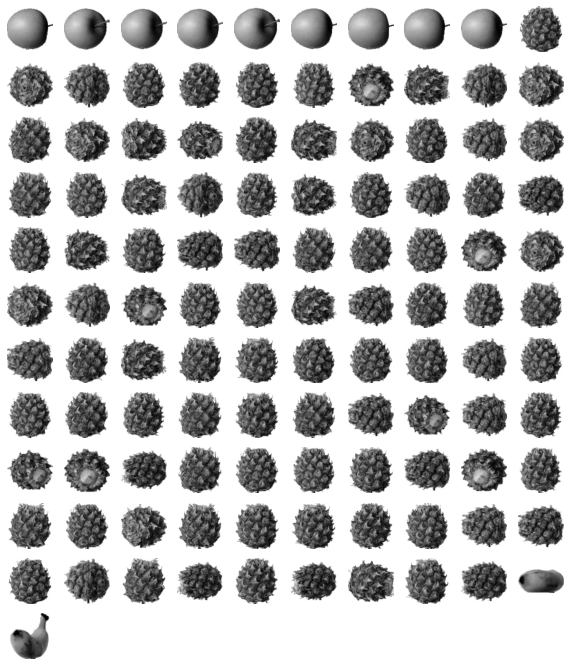

In [16]:
draw_fruits(fruits[km.labels_==0])

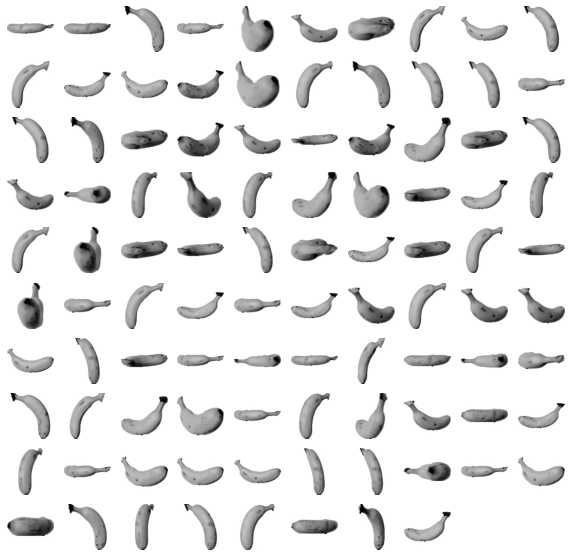

In [17]:
draw_fruits(fruits[km.labels_==1])

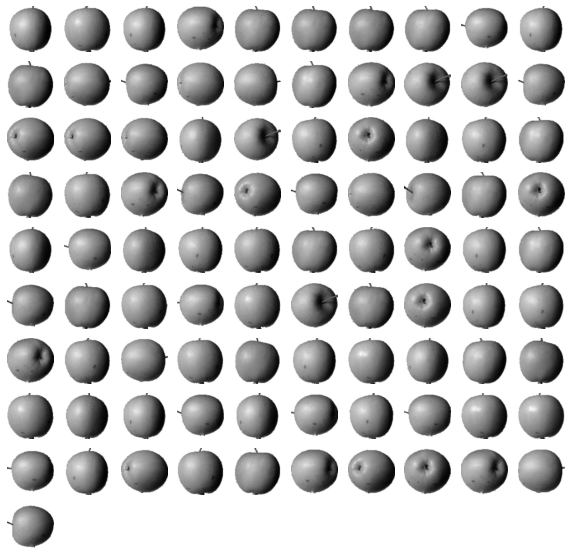

In [18]:
draw_fruits(fruits[km.labels_==2])

## 클러스터 중심
* KMeans 클래스가 최종적으로 찾은 클러스터 중심은 cluster_centers_ 속성에 저장되어 있습니다. 
* 이 배열은 fruits_2d 샘플의 클러스터 중심이기 때문에 이미지로 출력하려면 100 x 100 크기의 2차원 배열로 변경해야 합니다. 

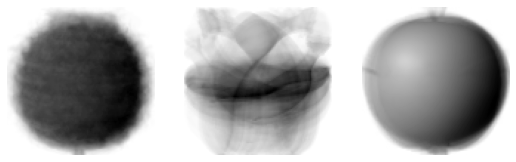

In [19]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

* KMeans 클래스는 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환해 주는 transform() 메서드를 가지고 있습니다. 
* transform() 메서드가 있다는 것은 마치 StandardScaler 클래스처럼 특성값을 변환하는 도구로 사용할수 있다는 의미입니다. 
* 100번째 데이터를 기준으로 3개의 평균까지의 거리를 계산합니다. 

In [21]:
print(km.transform(fruits_2d[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]


* 가장 거리가 짧은 곳이 속한 인덱스가 이 모델의 결과가 되겠습니다. 

In [23]:
print(km.predict(fruits_2d[100:101]))

[0]


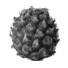

In [24]:
draw_fruits(fruits[100:101])

* K-평균 알고리즘은 앞에서 설명했듯이 반복적으로 클러스터 중심을 옮기면서 최적의 클러스터를 찾습니다. 반복한 횟수는 n_iter_속성에 저장됩니다. 

In [14]:
print(km.n_iter_)

3


## 최적의 k 찾기
* k-평균 알고리즘의 단점 중 하나는 클러스터 개수를 사전에 지정해야 한다는 점입니다. 
* 실전에서는 몇 개의 클러스터가 있는지 알 수 없습니다. 
### 적절한 K 값 찾기 
#### 엘보우(elbow) 
* k-평균 알고리즘은 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 잴 수 있습니다. 
* 이 거리를 제곱 합을 이너셔(inertia)라고 부릅니다. 
* 이너셔는 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지를 나타내는 값으로 생각할 수 있습니다. 
* 일반적으로 클러스터 개수가 늘어나면 클러스터 개개의 크기는 줄어들기 때문에 이너셔도 줄어듭니다. 
* 엘보우 방법은 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법입니다. 
* 클러스터 개수를 증가시키면서 이너셔를 그래프로 그리면 감소하는 속도가 꺾이는 지점이 있습니다. 이 지점부터는 클러스터 개수를 늘려도 클러스터에 잘 밀집된 정도가 크게 개선되지 않습니다. 
* 즉 이너셔가 크게 줄어들지 않습니다. 

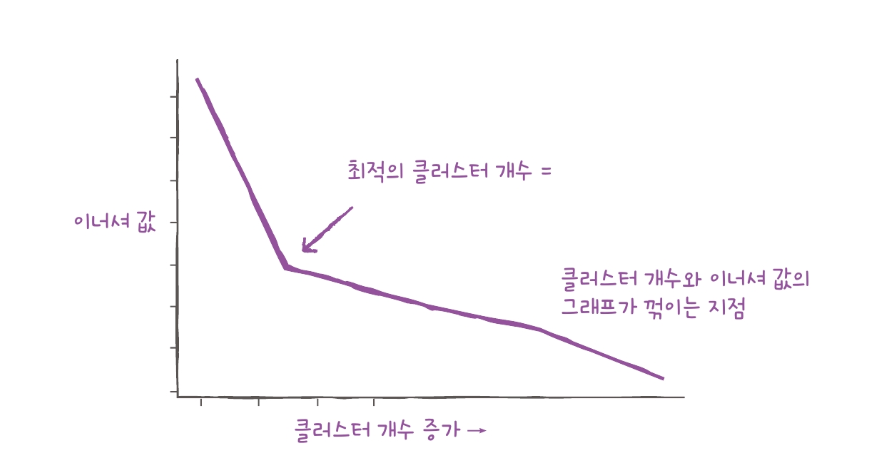

* 그림이 마치 팔꿈치 모양이어서 엘보우 방법이라고 부릅니다. 

* 이너셔의 개수는 inertia_속성에 저장됩니다. 
* k값을 변경하면서 이녀서의 값을 그려보겠습니다. 

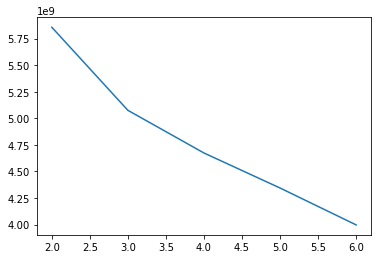

In [25]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.show()

## K-평균의 장점 
* 일반적인 군집화에서 가장 많이 활용되는 알고리즘 
* 알고리즘이 쉽게 간결합니다. 

## 단점 
* 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐 
* 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려짐 
* 몇 개의 군집(cluster)을 선택해야 할지 가이드하기 어려움 